# From Quality control to Clustering for day 11 samples

package loading

In [1]:
library(ggplot2)
library(cowplot)
library(dplyr)
library(scran)
library(biomaRt)
library(tibble)
library(AnnotationHub)
library(patchwork)
library(Seurat)
library(harmony)
library(magrittr)
library(SeuratWrappers)
library(scuttle)
library(gprofiler2)
library(ComplexHeatmap)
library(pheatmap)
library(viridis)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“le package ‘scran’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : SingleCellExperiment

Warning message:
“le package ‘SingleCellExperiment’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : SummarizedExperiment

Warning message:
“le package ‘SummarizedExperiment’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : MatrixGenerics

Warning message:
“le package ‘MatrixGenerics’ a été compilé avec la version R 4.3.2”
Le chargement a nécessité le package : matrixStats


Attachement du package : ‘matrixStats’


L'objet suivant est masqué depuis ‘package:dplyr’:

    count



Attachement du package : ‘MatrixGenerics’


Les objets suivants sont masqués depuis ‘package:matrixStats’:

  

Definitions of colors pallet

In [2]:
custom_colors <- list()

colors_dutch <- c(
  '#FFC312','#C4E538','#12CBC4','#FDA7DF','#ED4C67',
  '#F79F1F','#A3CB38','#1289A7','#D980FA','#B53471',
  '#EE5A24','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

plot resolution

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [4]:
embryo_mutli_species <- readRDS("/home/adufour/work/rds_storage/omics/stemcell_multi_species_obj.rds")

In [5]:
Idents(embryo_mutli_species) <- "species"

In [6]:
av.exp <- AverageExpression(embryo_mutli_species)$RNA

In [7]:
av.exp <- as.matrix(av.exp)

In [8]:
av.exp <- na.omit(av.exp)

In [9]:
cor.exp <- cor(av.exp, method = "spearman")

In [10]:
cor_matrix <- as.matrix(cor.exp)

In [11]:
HEATMAP2 <- Heatmap(
  cor_matrix,
  name = "Correlation",
  cell_fun = function(j, i, x, y, width, height, fill) {
    grid.text(sprintf("%.2f", cor_matrix[i, j]), x, y, gp = gpar(fontsize = 12))
  },
  cluster_columns = TRUE,
  show_column_dend = TRUE,
  cluster_column_slices = TRUE,
  column_title_gp = gpar(fontsize = 12),
  column_gap = unit(5, "mm"),
  cluster_rows = TRUE,
  show_row_dend = TRUE,
  cluster_row_slices = FALSE,
  col = viridis(100),
  row_names_gp = gpar(fontsize = 12),
  column_title_rot = 90,
  show_column_names = TRUE,
  use_raster = FALSE,
  raster_quality = 4)

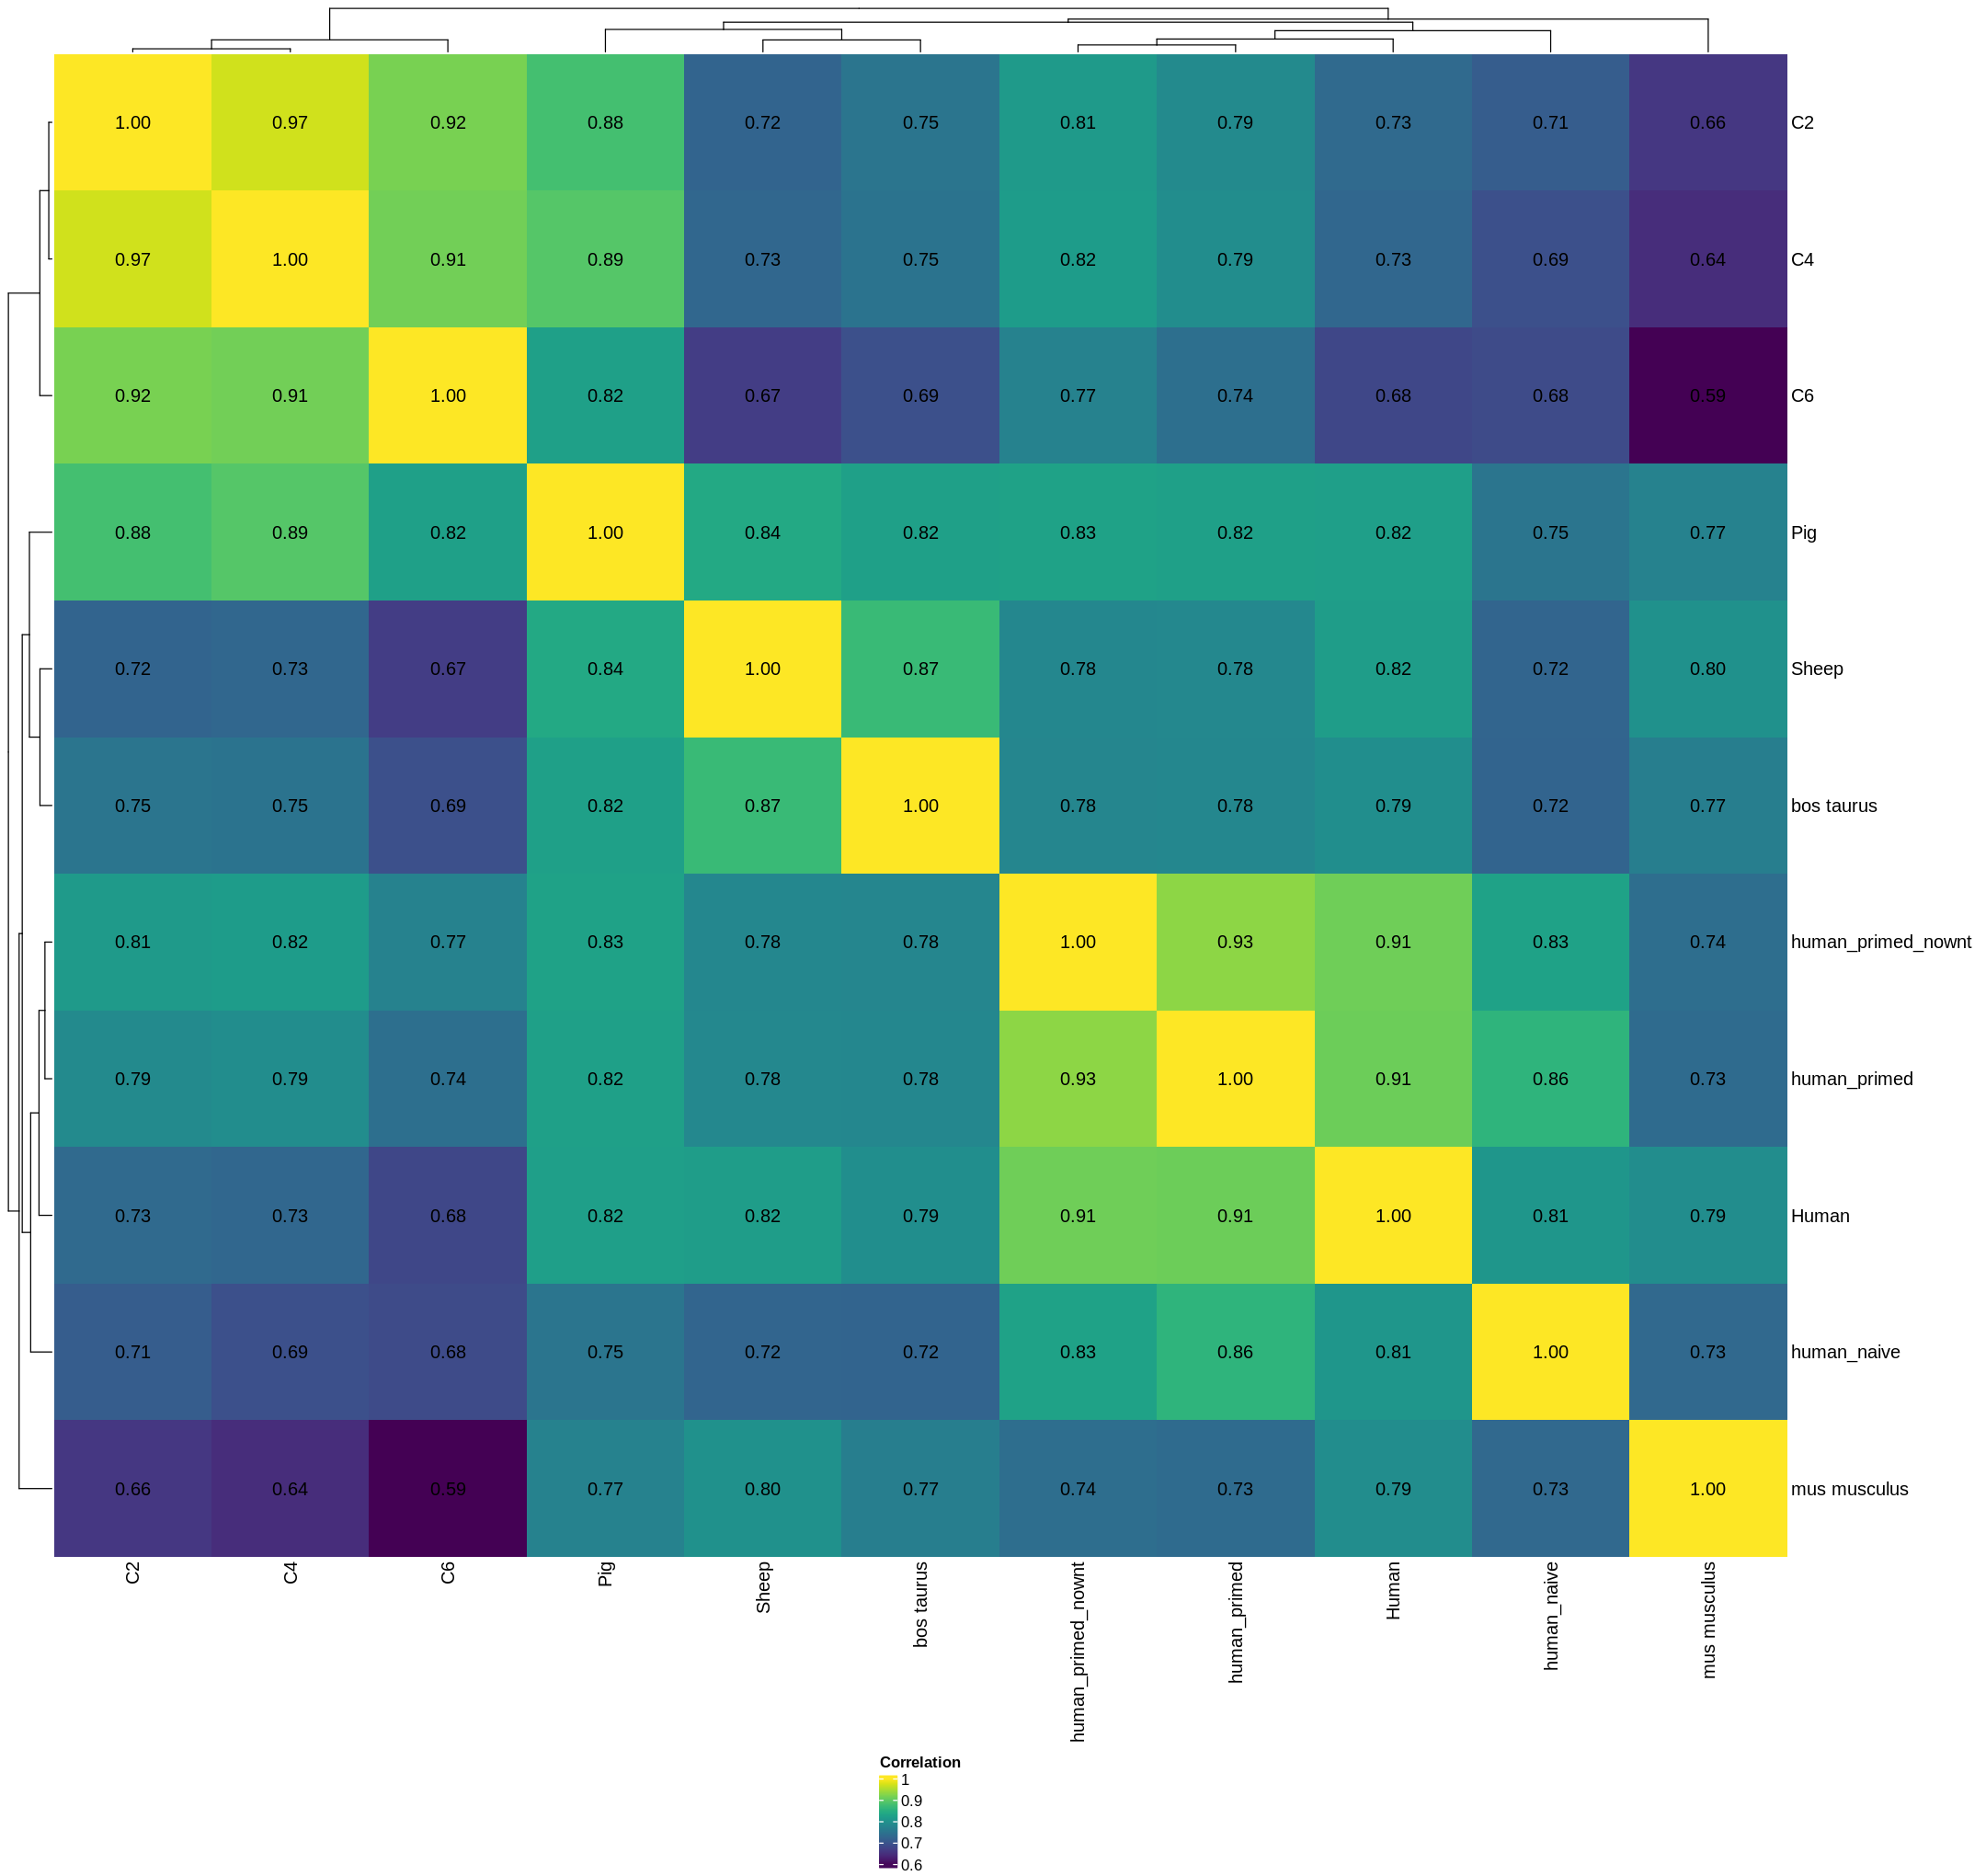

In [12]:
draw(HEATMAP2, heatmap_legend_side = "bottom")

In [193]:
# Open a new PDF file
pdf("/home/adufour/work/notebook/plots/gastrulation/correlation_esc.pdf", width = 9, height = 9)

# Draw the heatmap
draw(HEATMAP2, heatmap_legend_side = "bottom")

# Close the PDF file
dev.off()

png 
  2